In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from IPython.display import Image
from dateutil.parser import parse
import isodate

%matplotlib inline 

print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.3.4
numpy version: 1.20.3
matplotlib version: 3.4.3
seaborn version: 0.11.2


In [7]:
df = pd.read_csv('January.csv')
df

,Unnamed: 0,Station Code,Station Name,Train Number,Train Type,Train Company,Train Destination Planned,Train Destination Actual,Train Departure Planned,Train Departure Actual,Train Delay
0,0,VDW,Vlaardingen West,4197,Sprinter,NS,Rotterdam Centraal,Rotterdam Centraal,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
1,1,HLMS,Haarlem Spaarnwoude,14882,Sprinter,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
2,2,NSCH,Bad Nieuweschans,37598,Stoptrein,Arriva,Groningen,Groningen,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
3,3,HWD,Heerhugowaard,4082,Sprinter,NS,Den Helder,Den Helder,2016-02-01T00:10:00Z,2016-02-01T00:10:00Z,PT0S
4,4,BGN,Bergen op Zoom,2674,Intercity,NS,Vlissingen,Vlissingen,2016-01-31T23:01:00Z,2016-01-31T23:01:00Z,PT0S
...,...,...,...,...,...,...,...,...,...,...,...
5099986,5099986,WL,Wehl,30928,Stoptrein,Arriva,Arnhem,Arnhem,2016-02-29T07:58:00Z,2016-02-29T08:00:45Z,PT2M45S
5099987,5099987,HLM,Haarlem,2118,Intercity,NS,Amsterdam Centraal,Amsterdam Centraal,2016-02-29T07:47:00Z,2016-02-29T07:47:00Z,PT0S
5099988,5099988,HT,'s-Hertogenbosch,16026,Sprinter,NS,Utrecht Centraal,Utrecht Centraal,2016-02-29T08:02:00Z,2016-02-29T08:02:00Z,PT0S
5099989,5099989,UT,Utrecht Centraal,303528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-02-29T08:43:00Z,2016-02-29T08:43:00Z,PT0S


In [8]:
df = df.drop(columns = 'Unnamed: 0')

In [9]:
df = df.rename(columns={"Station Code": "Station_Code", "Station Name": "Station_Name", "Train Number": "Train_Number", "Train Type": "Train_Type", "Train Company": "Train_Company", "Train Destination Planned": "Train_Destination_Planned", "Train Destination Actual": "Train_Destination_Actual", "Train Departure Planned": "Train_Departure_Planned", "Train Departure Actual": "Train_Departure_Actual", "Train Delay": "Train_Delay"})

In [13]:
df['Train_Delay_Seconds'] = df.apply(lambda row: isodate.parse_duration(row.Train_Delay).total_seconds(), axis=1)

In [24]:
pd.value_counts(dfNijmegen['Train_Delay_Seconds'])

0.0       144889
61.0        1476
64.0        1433
63.0        1371
69.0        1361
           ...  
3748.0         1
3780.0         1
1440.0         1
1120.0         1
1721.0         1
Name: Train_Delay_Seconds, Length: 1232, dtype: int64

In [14]:
dfNijmegen = df.loc[df['Train_Destination_Planned'] == 'Nijmegen']
dfNijmegen

,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,Train_Delay_Seconds
28,EST,Elst,3689,Intercity,NS,Nijmegen,Nijmegen,2016-01-31T23:02:00Z,2016-01-31T23:02:09Z,PT9S,9.0
45,BMR,Boxmeer,32284,Stoptrein,Veolia,Nijmegen,Nijmegen,2016-01-31T23:00:00Z,2016-01-31T23:03:25Z,PT3M25S,205.0
130,HTO,'s-Hertogenbosch Oost,4488,Sprinter,NS,Nijmegen,Nijmegen,2016-01-31T22:59:00Z,2016-01-31T22:59:00Z,PT0S,0.0
135,ZD,Zaandam,3091,Intercity,NS,Nijmegen,Driebergen-Zeist,2016-01-31T23:05:00Z,2016-01-31T23:06:13Z,PT1M13S,73.0
152,KLP,Veenendaal-De Klomp,3091,Intercity,NS,Nijmegen,Veenendaal-De Klomp,2016-02-01T00:12:00Z,2016-02-01T00:12:00Z,PT0S,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5099816,UT,Utrecht Centraal,3027,Intercity,NS,Nijmegen,Nijmegen,2016-02-29T07:54:00Z,2016-02-29T07:54:00Z,PT0S,0.0
5099883,DB,Driebergen-Zeist,3127,Intercity,NS,Nijmegen,Nijmegen,2016-02-29T07:46:00Z,2016-02-29T07:46:00Z,PT0S,0.0
5099906,UT,Utrecht Centraal,3027,Intercity,NS,Nijmegen,Nijmegen,2016-02-29T07:54:00Z,2016-02-29T07:54:00Z,PT0S,0.0
5099941,HMBH,Helmond Brouwhuis,9632,Sprinter,NS,Nijmegen,Nijmegen,2016-02-29T08:55:00Z,2016-02-29T08:55:00Z,PT0S,0.0


In [15]:
pd.unique(dfNijmegen.Station_Name).shape

(69,)

In [16]:
dfNijmegen = pd.concat([dfNijmegen, pd.get_dummies(dfNijmegen.Station_Name)], axis=1);
dfNijmegen

,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,...,Velp,Venlo,Venray,Vierlingsbeek,Vught,Wijchen,Wijhe,Zaandam,Zutphen,Zwolle
28,EST,Elst,3689,Intercity,NS,Nijmegen,Nijmegen,2016-01-31T23:02:00Z,2016-01-31T23:02:09Z,PT9S,...,0,0,0,0,0,0,0,0,0,0
45,BMR,Boxmeer,32284,Stoptrein,Veolia,Nijmegen,Nijmegen,2016-01-31T23:00:00Z,2016-01-31T23:03:25Z,PT3M25S,...,0,0,0,0,0,0,0,0,0,0
130,HTO,'s-Hertogenbosch Oost,4488,Sprinter,NS,Nijmegen,Nijmegen,2016-01-31T22:59:00Z,2016-01-31T22:59:00Z,PT0S,...,0,0,0,0,0,0,0,0,0,0
135,ZD,Zaandam,3091,Intercity,NS,Nijmegen,Driebergen-Zeist,2016-01-31T23:05:00Z,2016-01-31T23:06:13Z,PT1M13S,...,0,0,0,0,0,0,0,1,0,0
152,KLP,Veenendaal-De Klomp,3091,Intercity,NS,Nijmegen,Veenendaal-De Klomp,2016-02-01T00:12:00Z,2016-02-01T00:12:00Z,PT0S,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099816,UT,Utrecht Centraal,3027,Intercity,NS,Nijmegen,Nijmegen,2016-02-29T07:54:00Z,2016-02-29T07:54:00Z,PT0S,...,0,0,0,0,0,0,0,0,0,0
5099883,DB,Driebergen-Zeist,3127,Intercity,NS,Nijmegen,Nijmegen,2016-02-29T07:46:00Z,2016-02-29T07:46:00Z,PT0S,...,0,0,0,0,0,0,0,0,0,0
5099906,UT,Utrecht Centraal,3027,Intercity,NS,Nijmegen,Nijmegen,2016-02-29T07:54:00Z,2016-02-29T07:54:00Z,PT0S,...,0,0,0,0,0,0,0,0,0,0
5099941,HMBH,Helmond Brouwhuis,9632,Sprinter,NS,Nijmegen,Nijmegen,2016-02-29T08:55:00Z,2016-02-29T08:55:00Z,PT0S,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

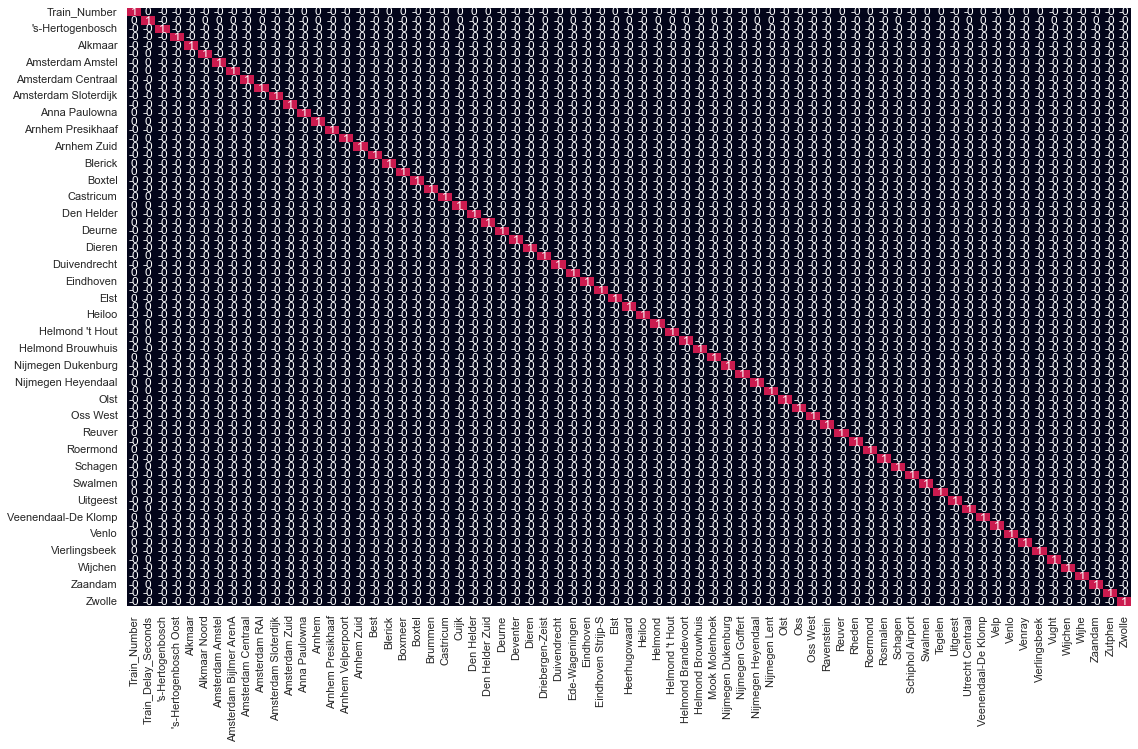

In [19]:
sns.set(rc={'figure.figsize':(18,11)})
sns.heatmap(dfNijmegen.corr().round(decimals=0), annot=True, cbar=None, vmax=2)